In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
path = "CMP_ventas.xlsx"
df = pd.read_excel(path, sheet_name="Hoja1")

In [10]:
df.head()

,Cliente,Ciudad,Fecha,Producto,Cantidad_mayor,Cantidad,Unidad,Precio_unidad,Valor_total,Entregado,Comentario,Pagado,Forma_de_pago
0,Wilmer Usuma,Charco,2020-02-25,Cebolla,Bulto,1.0,NaN,8000.0,96000.0,1,NaN,1,Contado
1,Wilmer Usuma,Charco,2020-02-25,Pegante,Caja,1.0,50.0,3500.0,175000.0,1,NaN,1,Contado
2,Wilmer Usuma,Charco,2020-02-25,Servilleta,Caja,2.0,NaN,4730.0,94600.0,1,NaN,1,Contado
3,Wilmer Usuma,Charco,2020-02-25,Azafran,Caja,5.0,200.0,170.0,850000.0,1,NaN,1,Contado
4,Wilmer Usuma,Charco,2020-02-25,Bombillo,Caja,2.0,100.0,100.0,200000.0,1,NaN,1,Contado


In [93]:
frecuencia_clientes = df["Cliente"].value_counts()

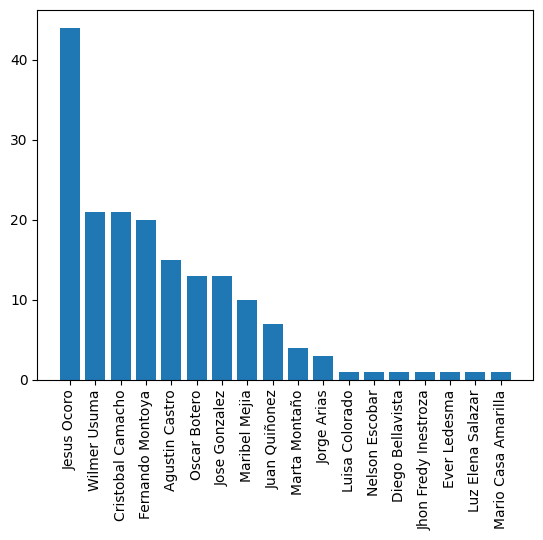

In [94]:
plt.bar(frecuencia_clientes.index, frecuencia_clientes.values)

plt.xticks(rotation=90)
plt.show()

In [81]:
df_monto_acumulado = pd.DataFrame(columns=["Cliente", "Valor_Acumulado"])

In [82]:
lista_unica_clientes = df["Cliente"].unique().tolist()

In [83]:
df_monto_acumulado["Cliente"] = lista_unica_clientes

In [84]:
def calcular_acumulado(client):
    return df[df["Cliente"] == client]["Valor_total"].sum()

In [85]:
df_monto_acumulado["Valor_Acumulado"] = df_monto_acumulado["Cliente"].apply(calcular_acumulado)

In [86]:
df_monto_acumulado = df_monto_acumulado.sort_values(by="Valor_Acumulado", ascending=False).reset_index(drop=True)

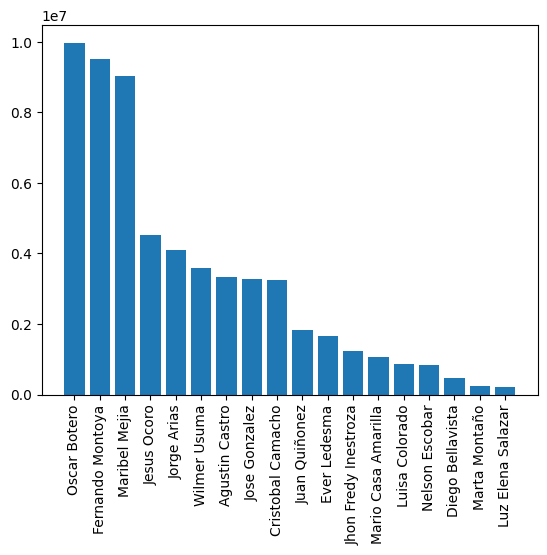

In [87]:
plt.bar(df_monto_acumulado["Cliente"], df_monto_acumulado["Valor_Acumulado"], )

plt.xticks(rotation=90)
plt.show()

In [133]:
df_muestra_1 = df
df_muestra_1["Cantidad"] = df_muestra_1["Cantidad"].fillna(0)
df_muestra_1["Cantidad"] = df_muestra_1["Cantidad"].astype(int)

In [141]:
df_muestra_1["Cantidad_mayor"] = df_muestra_1["Cantidad_mayor"].astype(str)
df_muestra_1["Cantidad_mayor"] = df_muestra_1["Cantidad_mayor"].fillna("None")

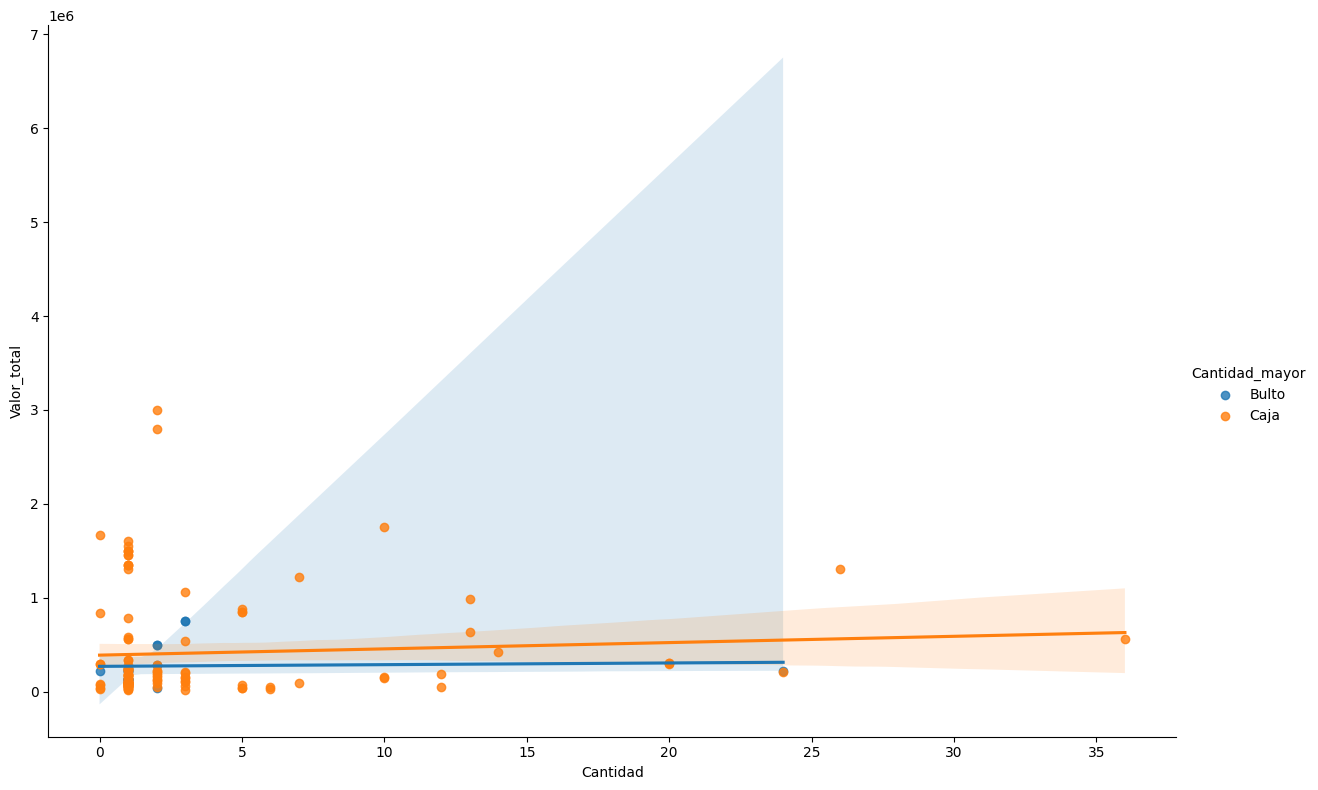

In [151]:
import seaborn as sns

#Lo mismo pero agregandole una tercera variable, la cual será __ y la identificaremos por color
ax2 = sns.lmplot(x="Cantidad", y="Valor_total", hue="Cantidad_mayor", data=df_muestra_1[(df_muestra_1["Cantidad_mayor"] != "None") & (df_muestra_1["Cantidad"] < 100)], height=8, aspect=1.5)
plt.show()